In [35]:
import json
import statistics
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
import matplotlib.pyplot as plt
from coordinate_converter import ssb_grid_id_to_utm_centroid, utm_to_latitude_longitude, utm_distance

In [3]:
od = {}
with open(f'data/od.json', 'r') as r:
    od = json.load(r)

In [4]:
od_paths = {}
with open(f'data/od_paths.json', 'r') as r:
    od_paths = json.load(r)

In [5]:
old = []
new = []
diffs = []
coords = []

for start_id in od_paths.keys():
    if start_id == "update_period_minutes":
        continue
    for end_id in od_paths[start_id]:
        try:
            travel_time = od[start_id][end_id]
            path_time = od_paths[start_id][end_id]["travel_time"]/60
            coords.append((start_id, end_id))
            old.append(travel_time)
            new.append(path_time)
            diffs.append(round(path_time-travel_time, 1))
        except:
            continue

In [6]:
print("Average travel time difference:", statistics.fmean(diffs))
print("Biggest differences:", max(diffs), min(diffs))
print("Median travel time old:", statistics.median(old))
print("Median travel time new:", statistics.median(new))

Average travel time difference: 2.776327119631595
Biggest differences: 68.3 -86.0
Median travel time old: 47.19708251953125
Median travel time new: 49.65


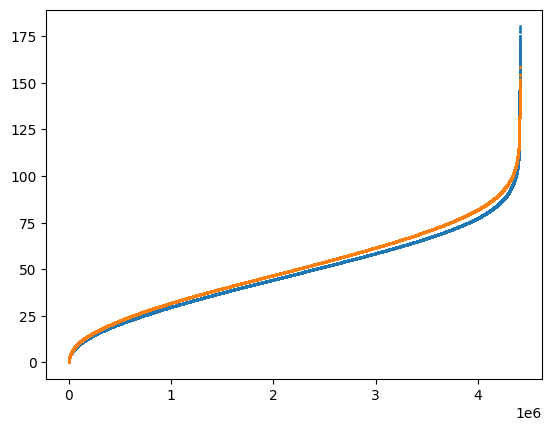

In [49]:
size_plt = len(old) # 1_000_000
old_plt = old[:size_plt]
new_plt = new[:size_plt]

old_plt = sorted(old_plt)
new_plt = sorted(new_plt)

plt.scatter(range(size_plt), old_plt, s=1, alpha=1)
plt.scatter(range(size_plt), new_plt, s=1, alpha=1)

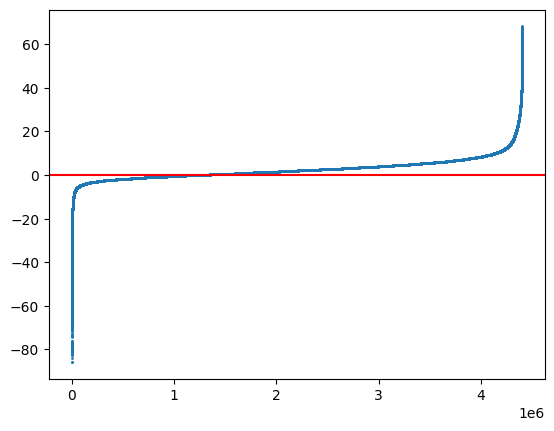

In [54]:
plt.scatter(range(size_plt), sorted(diffs), s=1, alpha=1)
plt.axhline(y=0, color='r', linestyle='-')

In [28]:
size = 0
processed = []
for i in range(len(diffs)):
    if (-30 > diffs[i] > -50 or 30 < diffs[i] < 50) and coords[i][0][0] != '_' and coords[i][1][0] != '_':
        size += 1
        start = ssb_grid_id_to_utm_centroid(int(coords[i][0]))
        end = ssb_grid_id_to_utm_centroid(int(coords[i][1]))
        newPath = True
        for a, b in processed:
            start_dist = utm_distance(start, a)
            end_dist = utm_distance(end, b)
            if start_dist + end_dist < 20000:
                newPath = False
                continue
        if newPath:
            processed.append((start, end))
            print("old", round(old[i]), "new", round(new[i]), utm_to_latitude_longitude(start), utm_to_latitude_longitude(end))

print(size)
print(len(processed))

old 32 new 62 [59.81994583616233, 10.352368185671335] [59.67512244127129, 10.585856808072819]
old 131 new 92 [59.81994583616233, 10.352368185671335] [60.502424697788626, 11.16636047827352]
old 79 new 116 [59.95482337424382, 10.35138932112118] [60.46231323613442, 10.73415320051563]
old 79 new 112 [59.803298043597806, 10.390392965527791] [59.778331535160106, 11.641996182242163]
old 128 new 83 [59.777687789320986, 10.429606496153356] [60.35538967487904, 11.056647025508225]
old 121 new 76 [59.78663877825996, 10.428379906796408] [60.23671698133227, 11.305948254720057]
old 81 new 120 [60.00207681874285, 10.41658123719641] [59.778331535160106, 11.641996182242163]
old 32 new 63 [59.67512244127129, 10.585856808072819] [59.81994583616233, 10.352368185671335]
old 64 new 95 [59.67512244127129, 10.585856808072819] [59.72789395782657, 11.433477387111095]
old 67 new 110 [59.73779322551512, 10.577582110417774] [59.622717552207064, 11.533363617444042]
old 60 new 102 [59.533638872275574, 10.657519827275

dist > 50

old 142 new 88 [59.81994583616233, 10.352368185671335] [60.47761708985336, 11.242138465182501]
80-100
old 128 new 77 [59.777687789320986, 10.429606496153356] [60.33220940711195, 11.18636753075537]
75-90
old 154 new 99 [59.81410952314188, 10.442467140272763] [60.487571661941125, 10.967708696834011]
90-110
old 62 new 116 [59.533638872275574, 10.657519827275921] [59.622247923437094, 11.515669487912273]
70*
old 60 new 110 [59.71271594139532, 10.634298087821957] [59.622247923437094, 11.515669487912273]
70*
old 82 new 133 [60.04694111895462, 10.680067716424123] [60.45680025117031, 10.84410645248356]
120
old 66 new 118 [59.56624913221259, 10.83052312919321] [59.715127488373284, 11.630546838435851]
80
old 104 new 31 [59.90656215108175, 10.787860535497755] [60.015923062916734, 10.558379870260936]
40
old 46 new 101 [60.46231323613442, 10.73415320051563] [60.148916281468644, 10.774882455370989]
50*
old 40 new 90 [59.63902130019247, 10.85700241936849] [59.69156190296072, 11.419565210360016]
45*
old 49 new 99 [59.73408103675596, 11.023307400989957] [59.622247923437094, 11.515669487912273]
60*
old 36 new 88 [59.68558021746655, 11.206866645385398] [59.709000491440015, 11.399910944155955]
50*
old 52 new 103 [59.75777269283615, 11.216491465330474] [59.715127488373284, 11.630546838435851]
90*
old 159 new 77 [60.39647086250004, 11.233341733806272] [59.81349157947516, 10.424695523007768]
70-80
old 46 new 97 [59.709000491440015, 11.399910944155955] [59.56624913221259, 10.83052312919321]
50*
old 36 new 88 [59.709000491440015, 11.399910944155955] [59.68558021746655, 11.206866645385398]
50*
old 48 new 100 [59.66659067642022, 11.493297966799243] [59.66866207494434, 10.942206998911493]
50*
old 62 new 116 [59.622247923437094, 11.515669487912273] [59.533638872275574, 10.657519827275921]
70*
old 60 new 110 [59.622247923437094, 11.515669487912273] [59.71271594139532, 10.634298087821957]
70*
old 67 new 118 [59.778331535160106, 11.641996182242163] [59.61271032180286, 10.877991495625917]
80*
old 106 new 158 [59.81464187341932, 11.656184116625635] [60.45680025117031, 10.84410645248356]
140

30 < dist < 50 

old 32 new 62 [59.81994583616233, 10.352368185671335] [59.67512244127129, 10.585856808072819]
45
old 131 new 92 [59.81994583616233, 10.352368185671335] [60.502424697788626, 11.16636047827352]
80-100
old 79 new 116 [59.95482337424382, 10.35138932112118] [60.46231323613442, 10.73415320051563]
85-90* (110-120)
old 79 new 112 [59.803298043597806, 10.390392965527791] [59.778331535160106, 11.641996182242163]
110
old 128 new 83 [59.777687789320986, 10.429606496153356] [60.35538967487904, 11.056647025508225]
80-100
old 121 new 76 [59.78663877825996, 10.428379906796408] [60.23671698133227, 11.305948254720057]
75-90
old 81 new 120 [60.00207681874285, 10.41658123719641] [59.778331535160106, 11.641996182242163]
120-140
old 32 new 63 [59.67512244127129, 10.585856808072819] [59.81994583616233, 10.352368185671335]
40-50
old 64 new 95 [59.67512244127129, 10.585856808072819] [59.72789395782657, 11.433477387111095]
90
old 67 new 110 [59.73779322551512, 10.577582110417774] [59.622717552207064, 11.533363617444042]
75-85*
old 60 new 102 [59.533638872275574, 10.657519827275921] [59.69156190296072, 11.419565210360016]
75*
old 100 new 134 [59.56050109834129, 10.654055001078007] [59.81464187341932, 11.656184116625635]
110*
old 60 new 91 [59.79329720427072, 10.62375324340862] [60.07789271328371, 11.413692978192742]
85-100
old 49 new 83 [59.8571524944317, 10.651108996527224] [60.00207681874285, 10.41658123719641]
90-110
old 37 new 68 [59.8571524944317, 10.651108996527224] [60.00760523108399, 11.152045540085908]
65-85
old 60 new 95 [59.8571524944317, 10.651108996527224] [60.16284256796045, 11.566736469631481]
90-110
old 34 new 0 [59.86610607548992, 10.649938009283437] [59.86610607548992, 10.649938009283437]
0
old 43 new 74 [59.57178365680036, 10.723496031895138] [59.78725605953891, 10.446137334014885]
50-55*
old 61 new 98 [59.92995661699059, 10.67739819331937] [59.81464187341932, 11.656184116625635]
100
old 80 new 127 [60.073214177806506, 10.658632305468215] [60.46231323613442, 10.73415320051563]
85*
old 70 new 105 [59.63504453795369, 10.73319578908196] [59.715127488373284, 11.630546838435851]
100*
old 6 new 49 [60.04694111895462, 10.680067716424123] [60.01229170981593, 10.7205172289432]
50
old 88 new 119 [60.04694111895462, 10.680067716424123] [59.715127488373284, 11.630546838435851]
120
old 54 new 85 [59.78004756610099, 10.768171863525161] [59.68308250066015, 11.438246730418134]
75*


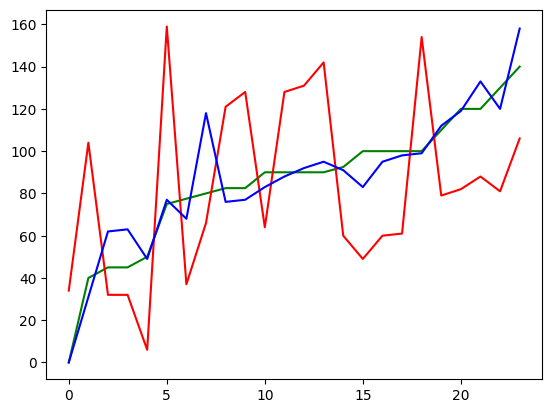

In [60]:
google = [90, 82.5, 100, 120, 80, 40, 75, 140, 45, 90, 110, 90, 82.5, 130, 45, 90, 92.5, 100, 77.5, 100, 0, 100, 50, 120]
old_select = [142, 128, 154, 82, 66, 104, 159, 106, 32, 131, 79, 128, 121, 81, 32, 64, 60, 49, 37, 60, 34, 61, 6, 88]
new_select = [88, 77, 99, 133, 118, 31, 77, 158, 62, 92, 112, 83, 76, 120, 63, 95, 91, 83, 68, 95, 0, 98, 49, 119]

old_select = [x for _, x in sorted(zip(google, old_select))]
new_select = [x for _, x in sorted(zip(google, new_select))]
google = sorted(google)

x = range(len(google))
plt.plot(x, google, c="green")
plt.plot(x, old_select, c="red")
plt.plot(x, new_select, c="blue")